In [12]:
# load and summarize the housing dataset
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import ElasticNet
from sksurv.linear_model import CoxnetSurvivalAnalysis as CoxPH

import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


proteins = pd.read_csv('Data/Processed/Full/full_train.csv', index_col = 'eid')
# summarize shape
print(proteins.shape) #345 proteins
# summarize first few lines
print(proteins.head())

(28487, 1428)
          AARSD1  ABHD14B    ABL1   ACAA1    ACAN     ACE2   ACOX1    ACP5  \
eid                                                                          
1000041  0.34760  -0.1879 -0.3896  0.1511  0.5124 -0.28310  0.2759 -0.3092   
1000086  0.76670   0.1949 -0.5907 -2.0024  0.1910  0.05565 -0.5210 -0.0292   
1000181 -0.43050  -0.3222 -0.3300 -0.5217 -0.4388 -0.33185 -0.3997 -0.4358   
1000345  0.31910   0.5591  0.4769 -0.2783  0.2849  0.16560  0.0844 -0.0938   
1000374 -0.19775  -1.1510 -0.5480  0.6309  0.1449  0.76155  0.1626 -0.3390   

           ACP6   ACTA2  ...   WNT9A    WWP2    XCL1      XG  XPNPEP2  \
eid                      ...                                            
1000041 -0.2001 -0.3444  ... -0.1501  0.1150 -1.1485 -0.1583   1.0802   
1000086 -0.3807 -0.3239  ... -0.1429 -0.4454  0.2656 -0.1033   1.5979   
1000181  0.0848  0.0293  ... -0.0308 -0.0307  0.3940  0.1194  -0.8755   
1000345  0.0633 -0.0207  ...  0.0618  0.3204 -0.3574 -0.5261  -0.3112   
1

In [2]:
trainset_allprot = proteins
mort = pd.read_csv("Data/Processed/Full/mort_full_train.csv", index_col = 'eid')
trainset_allprot_sex= pd.merge(trainset_allprot, mort[['sex']], on = "eid")

print(mort.head())
print(mort.shape)
mort = mort.drop(columns= 'Unnamed: 0')
print(trainset_allprot.head())

         Unnamed: 0  died  censorage  sex
eid                                      
1000041           3     0  77.678987  1.0
1000059           4     0  64.368241  1.0
1000086           7     0  60.144422  1.0
1000181          17     0  68.170431  0.0
1000345          33     0  59.466804  1.0
(28487, 4)
          AARSD1  ABHD14B    ABL1   ACAA1    ACAN     ACE2   ACOX1    ACP5  \
eid                                                                          
1000041  0.34760  -0.1879 -0.3896  0.1511  0.5124 -0.28310  0.2759 -0.3092   
1000086  0.76670   0.1949 -0.5907 -2.0024  0.1910  0.05565 -0.5210 -0.0292   
1000181 -0.43050  -0.3222 -0.3300 -0.5217 -0.4388 -0.33185 -0.3997 -0.4358   
1000345  0.31910   0.5591  0.4769 -0.2783  0.2849  0.16560  0.0844 -0.0938   
1000374 -0.19775  -1.1510 -0.5480  0.6309  0.1449  0.76155  0.1626 -0.3390   

           ACP6   ACTA2  ...   WNT9A    WWP2    XCL1      XG  XPNPEP2  \
eid                      ...                                            
10

In [20]:
#y = [(e1, e2) for e1, e2 in mort[['died_bool', 'censorage']].values]

In [21]:
#X.dtype

In [22]:
#from sksurv.datasets import load_breast_cancer
#from sksurv.preprocessing import OneHotEncoder

#X, y = load_breast_cancer()
#Xt = OneHotEncoder().fit_transform(X)
#Xt.round(2).head()

In [23]:
#Xt.values.dtype

In [24]:
#X.values.dtype

In [25]:
#print(model.fit(X,y))


In [3]:
trainset_allprot

,AARSD1,ABHD14B,ABL1,ACAA1,ACAN,ACE2,ACOX1,ACP5,ACP6,ACTA2,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
eid,,,,,,,,,,,,,,,,,,,,,
1000041,0.34760,-0.18790,-0.38960,0.1511,0.5124,-0.28310,0.27590,-0.30920,-0.20010,-0.3444,...,-0.1501,0.1150,-1.1485,-0.15830,1.08020,0.00705,-0.5165,-0.20180,-0.39815,-0.74750
1000086,0.76670,0.19490,-0.59070,-2.0024,0.1910,0.05565,-0.52100,-0.02920,-0.38070,-0.3239,...,-0.1429,-0.4454,0.2656,-0.10330,1.59790,-0.83675,-1.1427,-1.48585,-0.55125,-0.02300
1000181,-0.43050,-0.32220,-0.33000,-0.5217,-0.4388,-0.33185,-0.39970,-0.43580,0.08480,0.0293,...,-0.0308,-0.0307,0.3940,0.11940,-0.87550,0.18495,-0.2938,-0.43035,-0.27505,-0.48650
1000345,0.31910,0.55910,0.47690,-0.2783,0.2849,0.16560,0.08440,-0.09380,0.06330,-0.0207,...,0.0618,0.3204,-0.3574,-0.52610,-0.31120,-0.18660,1.0092,0.96570,0.36930,0.30520
1000374,-0.19775,-1.15100,-0.54800,0.6309,0.1449,0.76155,0.16260,-0.33900,0.21480,-0.5160,...,-0.2785,-0.6922,-0.4396,0.35520,1.01920,-0.12455,-1.4010,-1.59375,-0.98945,-0.36310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6018250,0.25695,0.93185,-0.23955,1.5582,0.7545,1.95090,-0.02395,0.54615,-0.05695,1.0524,...,0.2433,0.1637,-0.7885,0.01385,-0.26325,0.02085,0.8589,-0.53675,-0.63440,0.00555
5520133,0.19470,0.43600,1.46980,1.5125,-0.3243,0.67695,0.13910,0.17830,0.82900,-0.6493,...,-0.5610,0.9342,0.7327,0.31530,-0.34910,0.08655,2.4255,1.00175,1.18315,0.15930
2176533,-0.12680,-1.02730,-0.59250,-0.5497,0.5747,-0.40410,-0.55960,0.00280,0.43550,0.0644,...,0.2236,-0.2279,-0.3594,0.37990,1.07560,-0.03235,-0.8067,-1.37380,-0.62455,0.69340


In [1]:
 X_sex = trainset_allprot_sex
 y_tmp = [(e1, e2) for e1, e2 in mort[['died', 'censorage']].values]
 y_sex = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # define model


l1_ratios = np.arange(0.1, 1.0, 0.1)
l1_rations = 0.9
scores_sex = np.zeros((len(l1_ratios), 3))
cv = KFold(n_splits=5, shuffle=True, random_state=0)
for j, l1_ratio in enumerate(l1_ratios):
    coxnet_pipe = make_pipeline(StandardScaler(), CoxPH(l1_ratio=l1_ratio, alpha_min_ratio=0.01, max_iter=100))
    warnings.simplefilter("ignore", UserWarning)
    warnings.simplefilter("ignore", FitFailedWarning)
    coxnet_pipe.fit(X_sex, y_sex)
    estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
    gcv = GridSearchCV(
        make_pipeline(StandardScaler(), CoxPH(l1_ratio=0.9)),
        param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
        cv=cv,
        error_score=0.5,
        n_jobs=1,
    ).fit(X_sex, y_sex)
    cv_results = pd.DataFrame(gcv.cv_results_)
    alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
    mean = cv_results.mean_test_score
    std = cv_results.std_test_score
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(alphas, mean)
    ax.fill_between(alphas, mean - std, mean + std, alpha=0.15)
    ax.set_xscale("log")
    ax.set_ylabel("concordance index")
    ax.set_xlabel("alpha")
    ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
    ax.axhline(0.5, color="grey", linestyle="--")
    ax.grid(True)


cv_results.to_csv("grid_results_sex.csv", encoding='utf-8', index=False)


#    cv = KFold(n_splits=5, shuffle=True, random_state=328)
#    coxnet = CoxPH(l1_ratio=l1_ratio, alpha_min_ratio=0.01).fit(X_sex, y_sex)
#    gcv = GridSearchCV(
#        coxnet,
#        {"alphas": [[v] for v in coxnet.alphas_]},
#        cv=cv, error_score=0, n_jobs=4).fit(X_sex, y_sex)
#    scores_sex[j,0] = l1_ratios[j]
#    scores_sex[j,1] = gcv.best_params_['alphas'][0]
#    scores_sex[j,2] = gcv.best_score_

# model = CoxPH()
# # # define model evaluation method
# # cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
# # # define grid
# # grid = dict()
# # grid['alphas'] = [[1e-5] , [1e-3],  [1e-1], [0.0],  [10.0]]
# # grid['l1_ratio'] = np.arange(0.1, 1, 0.4)
# alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
# l1_ratios = np.arange(0.1, 1, 0.1)

# scores_sex = np.zeros((len(alphas), len(l1_ratios)))
# for i, alpha in enumerate(alphas):
#     for j, l1_ratio in enumerate(l1_ratios):
#         model.set_params(alphas = alpha, l1_ratio = l1_ratio)
#         model.fit(X,y)
#         scores_sex[i,j] = model.score(X, y)
        

# # define search
# # search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # perform the search
# # print(model.fit(X,y))
# # results = search.fit(X, y)
# # summarize
# # print('MAE: %.3f' % results.best_score_)
# # print('Config: %s' % results.best_params_)

NameError: name 'trainset_allprot_sex' is not defined

In [ ]:
 #with open("scores_sex_grid.npy", "wb") as f:
 #    np.save(f, scores_sex)

In [8]:
 scores_sex_grid = np.load("scores_sex_grid.npy")
scores_sex_grid


array([[0.1       , 0.02305176, 0.50844199],
       [0.2       , 0.01152588, 0.50894419],
       [0.3       , 0.00768392, 0.50923808],
       [0.4       , 0.00576294, 0.50940923],
       [0.5       , 0.00461035, 0.50954046],
       [0.6       , 0.00384196, 0.5096567 ],
       [0.7       , 0.00329311, 0.50970038],
       [0.8       , 0.00288147, 0.50971583],
       [0.9       , 0.00256131, 0.50975506]])

In [9]:
scores_sexadj = np.load("scores_sex.npy")
scores_sexadj

array([[0.68207902, 0.68196112, 0.682235  , 0.68211407, 0.68194345,
        0.68198215, 0.68197712, 0.68193866, 0.68200497],
       [0.68209847, 0.68212047, 0.68216894, 0.68197096, 0.68230581,
        0.68213392, 0.68203438, 0.68181441, 0.68154441],
       [0.67903255, 0.67325592, 0.66526494, 0.65661958, 0.6472165 ,
        0.6381828 , 0.62999806, 0.62182528, 0.61397896],
       [0.59903794, 0.55951221, 0.53980819, 0.52870022, 0.52079299,
        0.51506981, 0.51439798, 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.68263051, 0.68263051, 0.68263051, 0.68263051, 0.68263051,
        0.68263051, 0.68263051, 0.68263051, 0.68263051],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],


In [ ]:
 # X = trainset_allprot
 # y_tmp = [(e1, e2) for e1, e2 in mort[['died', 'censorage']].values]
 # y = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # # define model
 # model = CoxPH()
 # # # define model evaluation method
 # # cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
 # # # define grid
 # # grid = dict()
 # # grid['alphas'] = [[1e-5] , [1e-3],  [1e-1], [0.0],  [10.0]]
 # # grid['l1_ratio'] = np.arange(0.1, 1, 0.4)
 # alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
 # l1_ratios = np.arange(0.1, 1, 0.1)
 # scores = np.zeros((len(alphas), len(l1_ratios)))
 # for i, alpha in enumerate(alphas):
 #     for j, l1_ratio in enumerate(l1_ratios):
 #         model.set_params(alphas = alpha, l1_ratio = l1_ratio)
 #         model.fit(X,y)
 #         scores[i,j] = model.score(X, y)
        

 # # define search
 # # search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # # perform the search
 # # print(model.fit(X,y))
 # # results = search.fit(X, y)
 # # summarize
 # # print('MAE: %.3f' % results.best_score_)
 # # print('Config: %s' % results.best_params_)

In [ ]:
 # with open("scores_all.npy", "wb") as f:
 #     np.save(f, scores)


In [ ]:
# model.set_params(alphas =[ 1e-5], l1_ratio = 0.1)
# model.fit(X,y)

In [ ]:
# model.coef_

In [ ]:
#best_score_inds = np.argmax(scores)
#print(f'best settings are for alpha = {alphas[best_score_inds[0]]}, l1_ratio = {l1_ratios[best_score_inds[1]]}')

In [4]:
mort_male = mort.loc[mort['sex'] == 1]
mort_female = mort.loc[mort['sex'] == 0]

trainset_male = trainset_allprot.loc[trainset_allprot.index.isin(mort_male.index)] 
trainset_female = trainset_allprot.loc[trainset_allprot.index.isin(mort_female.index)] 
print(trainset_male.head())

          AARSD1  ABHD14B     ABL1   ACAA1    ACAN     ACE2    ACOX1     ACP5  \
eid                                                                             
1000041  0.34760 -0.18790 -0.38960  0.1511  0.5124 -0.28310  0.27590 -0.30920   
1000086  0.76670  0.19490 -0.59070 -2.0024  0.1910  0.05565 -0.52100 -0.02920   
1000345  0.31910  0.55910  0.47690 -0.2783  0.2849  0.16560  0.08440 -0.09380   
1001039  0.09245  0.14800  0.60380  0.8137 -0.2499  0.05055  0.19520 -0.07780   
1002171  0.11895  0.20455 -0.54515  1.1676  0.1741  1.14470  0.40565  0.23845   

            ACP6   ACTA2  ...   WNT9A    WWP2    XCL1       XG  XPNPEP2  \
eid                       ...                                             
1000041 -0.20010 -0.3444  ... -0.1501  0.1150 -1.1485 -0.15830  1.08020   
1000086 -0.38070 -0.3239  ... -0.1429 -0.4454  0.2656 -0.10330  1.59790   
1000345  0.06330 -0.0207  ...  0.0618  0.3204 -0.3574 -0.52610 -0.31120   
1001039 -2.16000 -0.1075  ...  0.0000  0.6201  0.4804 -0.

In [ ]:
# X_male = trainset_male
# y_tmp = [(e1, e2) for e1, e2 in mort_male[['died', 'censorage']].values]
# y_male = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
# # define model
# model = CoxPH()
# # # define model evaluation method
# # cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
# # # define grid
# # grid = dict()
# # grid['alphas'] = [[1e-5] , [1e-3],  [1e-1], [0.0],  [10.0]]
# # grid['l1_ratio'] = np.arange(0.1, 1, 0.4)
# alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
# l1_ratios = np.arange(0.1, 1, 0.1)

# m_scores = np.zeros((len(alphas), len(l1_ratios)))
# for i, alpha in enumerate(alphas):
#     for j, l1_ratio in enumerate(l1_ratios):
#         model.set_params(alphas = alpha, l1_ratio = l1_ratio)
#         model.fit(X_male,y_male)
#         m_scores[i,j] = model.score(X_male, y_male)
        

In [ ]:
 # with open("scores_men.npy", "wb") as f:
 #     np.save(f, m_scores)


In [ ]:
 # X_female = trainset_female
 # y_tmp = [(e1, e2) for e1, e2 in mort_female[['died', 'censorage']].values]
 # y_female = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # # define model
 # model = CoxPH()
 # # # define model evaluation method
 # # cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
 # # # define grid
 # # grid = dict()
 # # grid['alphas'] = [[1e-5] , [1e-3],  [1e-1], [0.0],  [10.0]]
 # # grid['l1_ratio'] = np.arange(0.1, 1, 0.4)
 # alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
 # l1_ratios = np.arange(0.1, 1, 0.1)

 # w_scores = np.zeros((len(alphas), len(l1_ratios)))
 # for i, alpha in enumerate(alphas):
 #     for j, l1_ratio in enumerate(l1_ratios):
 #         model.set_params(alphas = alpha, l1_ratio = l1_ratio)
 #         model.fit(X_female,y_female)
 #         w_scores[i,j] = model.score(X_female, y_female)

In [ ]:
 # print('All')
 # print(scores)

 # print('Men')
 # print(m_scores)

 # print('Women')
 # print(w_scores)

In [ ]:
 # with open("scores_women.npy", "wb") as f:
 #     np.save(f, w_scores)

In [5]:
 scores_all = np.load("scores_all.npy")
 scores_w = np.load("scores_women.npy")
 scores_m = np.load("scores_men.npy")
 scores_sexadj = np.load("scores_sex.npy")

In [6]:
 scores_w[0,8]

0.7726620071936376

In [8]:
 #inds_best_w

NameError: name 'inds_best_w' is not defined

In [7]:
 inds_best_all =  np.unravel_index(scores_all.argmax(), scores_all.shape)
 inds_best_w =  np.unravel_index(scores_w.argmax(), scores_all.shape)
 inds_best_m = np.unravel_index(scores_m.argmax(), scores_all.shape)
 inds_best_sexadj = np.unravel_index(scores_sexadj.argmax(), scores_sexadj.shape)

In [8]:
scores_all

array([[0.68208089, 0.68196255, 0.68224614, 0.68212706, 0.68192908,
        0.68198591, 0.68197086, 0.68194696, 0.68197064],
       [0.68209722, 0.68210208, 0.68217765, 0.68197975, 0.68230693,
        0.6821504 , 0.6820444 , 0.68181446, 0.68154307],
       [0.67904654, 0.67325462, 0.66526502, 0.65661958, 0.6472165 ,
        0.6381828 , 0.62999806, 0.62182528, 0.61397896],
       [0.59903794, 0.55951221, 0.53980819, 0.52870022, 0.52079299,
        0.51506981, 0.51439798, 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.68265989, 0.68265989, 0.68265989, 0.68265989, 0.68265989,
        0.68265989, 0.68265989, 0.68265989, 0.68265989],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],


In [9]:
scores_sexadj

array([[0.68207902, 0.68196112, 0.682235  , 0.68211407, 0.68194345,
        0.68198215, 0.68197712, 0.68193866, 0.68200497],
       [0.68209847, 0.68212047, 0.68216894, 0.68197096, 0.68230581,
        0.68213392, 0.68203438, 0.68181441, 0.68154441],
       [0.67903255, 0.67325592, 0.66526494, 0.65661958, 0.6472165 ,
        0.6381828 , 0.62999806, 0.62182528, 0.61397896],
       [0.59903794, 0.55951221, 0.53980819, 0.52870022, 0.52079299,
        0.51506981, 0.51439798, 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.68263051, 0.68263051, 0.68263051, 0.68263051, 0.68263051,
        0.68263051, 0.68263051, 0.68263051, 0.68263051],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],


In [10]:
scores_w

array([[0.77167178, 0.77173076, 0.77173676, 0.77250108, 0.77253604,
        0.77202955, 0.77179932, 0.77178711, 0.77266201],
       [0.7724026 , 0.77231234, 0.77175941, 0.77140658, 0.77116002,
        0.77068977, 0.77037759, 0.77026332, 0.76982676],
       [0.76237119, 0.75480493, 0.7456915 , 0.73602082, 0.72630506,
        0.71599381, 0.70610575, 0.69666487, 0.68763128],
       [0.66927856, 0.6207441 , 0.58362717, 0.55598593, 0.54152208,
        0.53075327, 0.52385206, 0.52361456, 0.51900381],
       [0.51900381, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.77161701, 0.77161701, 0.77161701, 0.77161701, 0.77161701,
        0.77161701, 0.77161701, 0.77161701, 0.77161701],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],


In [11]:
scores_m

array([[0.74678121, 0.74679029, 0.74684613, 0.74685621, 0.74687838,
        0.74695642, 0.74696147, 0.7469984 , 0.74707376],
       [0.74690636, 0.7470954 , 0.74746034, 0.74735114, 0.74727818,
        0.7471515 , 0.74698528, 0.74693478, 0.7467766 ],
       [0.74284736, 0.73831373, 0.73244269, 0.72508266, 0.71727216,
        0.70934102, 0.70165025, 0.69368252, 0.68549512],
       [0.6652136 , 0.615131  , 0.58122252, 0.55952458, 0.54586429,
        0.53548838, 0.53077415, 0.52880931, 0.5273623 ],
       [0.52396276, 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.7467255 , 0.7467255 , 0.7467255 , 0.7467255 , 0.7467255 ,
        0.7467255 , 0.7467255 , 0.7467255 , 0.7467255 ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       ],


In [12]:
inds_best_all, inds_best_w, inds_best_m, inds_best_sexadj

((5, 0), (0, 8), (1, 2), (5, 0))

In [13]:
l1_ratios[inds_best_all[1]]

NameError: name 'l1_ratios' is not defined

In [14]:
 X = trainset_allprot
 y_tmp = [(e1, e2) for e1, e2 in mort[['died', 'censorage']].values]
 y = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # define model
 model_all = CoxPH()

 alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
 l1_ratios = np.arange(0.1, 1, 0.1)

 scores = np.zeros((len(alphas), len(l1_ratios)))
 model_all.set_params(alphas = alphas[inds_best_all[0]], l1_ratio = l1_ratios[inds_best_all[1]])
 model_all.fit(X,y)
 score_all = model_all.score(X, y)


In [17]:
 X_sex = trainset_allprot_sex
 y_tmp = [(e1, e2) for e1, e2 in mort[['died', 'censorage']].values]
 y_sex = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # define model
 model_sexadj = CoxPH()

 alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
 l1_ratios = np.arange(0.1, 1, 0.1)

 scores = np.zeros((len(alphas), len(l1_ratios)))
 model_sexadj.set_params(alphas = alphas[inds_best_sexadj[0]], l1_ratio = l1_ratios[inds_best_sexadj[1]])
 model_sexadj.fit(X_sex,y_sex)
 score_sexadj = model_sexadj.score(X_sex, y_sex)


In [18]:
 model_sexadj.coef_[trainset_allprot_sex.columns.get_loc('sex')]

array([0.0099632])

In [33]:
# trainset_allprot_sex.columns.get_loc('sex')

1428

In [19]:
 X_male = trainset_male
 y_tmp = [(e1, e2) for e1, e2 in mort_male[['died', 'censorage']].values]
 y_male = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # define model
 model_male = CoxPH()

 alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
 l1_ratios = np.arange(0.1, 1, 0.1)

 scores = np.zeros((len(alphas), len(l1_ratios)))
 model_male.set_params(alphas = alphas[inds_best_m[0]], l1_ratio = l1_ratios[inds_best_m[1]])
 model_male.fit(X_male,y_male)
 score_m = model_male.score(X_male, y_male)


In [20]:
 X_female = trainset_female
 y_tmp = [(e1, e2) for e1, e2 in mort_female[['died', 'censorage']].values]
 y_female = np.array(y_tmp, dtype = [("Status", "?"), ("Survival_in_days", "<f8")])
 # define model
 model_female = CoxPH()

 alphas =  [[1e-5] ,[1e-4],[1e-3],[1e-2],[1e-1], [0.0], [1.0] ,[10.0], [100]]
 l1_ratios = np.arange(0.1, 1, 0.1)

 scores = np.zeros((len(alphas), len(l1_ratios)))
 model_female.set_params(alphas = alphas[inds_best_w[0]], l1_ratio = l1_ratios[inds_best_w[1]])
 model_female.fit(X_female,y_female)
 score_f = model_female.score(X_female, y_female)


In [27]:
score_f

0.7726620071936376

In [21]:
 inds_best_w[1]

8

Text(0.5, 0, 'proteins')

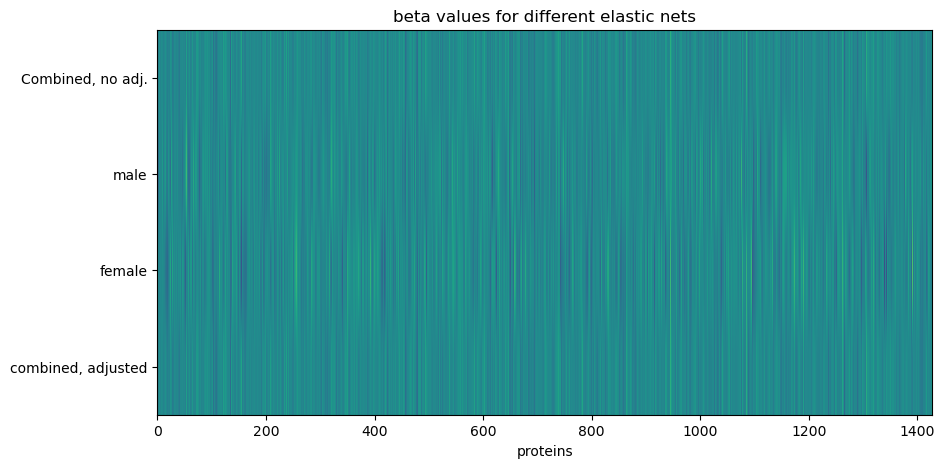

In [21]:
 coefs_all = model_all.coef_
 coefs_m = model_male.coef_
 coefs_f = model_female.coef_
 coefs_s = model_sexadj.coef_

 fig, ax = plt.subplots(figsize = (10, 5))
 all_coefs = np.concatenate((coefs_all, coefs_m, coefs_f, coefs_s[:1428]), axis = 1)
 ax.imshow(all_coefs[:,:].T, aspect = "auto")
 ax.set_yticks(np.arange(4), ['Combined, no adj.', 'male', 'female', 'combined, adjusted'])
 plt.title("beta values for different elastic nets")
 plt.xlabel("proteins")

In [22]:
def closest(lst, K):
     
     lst = np.asarray(lst)
     idx = (np.abs(lst - K)).argmin()
     return lst[idx]

K = 0
print(closest(coefs_s, K))

[-8.13475711e-05]


In [23]:
all_coefs

array([[-0.00328857, -0.06756088, -0.0130626 , -0.00303419],
       [-0.15516249, -0.19617656, -0.08115758, -0.15449942],
       [-0.02026802, -0.21141903, -0.03737685, -0.0181634 ],
       ...,
       [-0.0231104 ,  0.05225446, -0.11270393, -0.02292344],
       [ 0.05194141,  0.01613895, -0.08924258,  0.05200867],
       [ 0.06957498,  0.14263274,  0.        ,  0.06923738]])

In [30]:
 print(score_all, score_m, score_f, score_sexadj)

0.682659888917931 0.7474603445412237 0.7726620071936376 0.6826305099615697


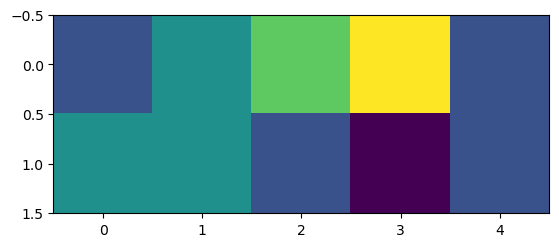

In [31]:
 ar = np.array([[2,3,4 ,5,2 ], [3, 3,2, 1, 2,]])

 fig, ax = plt.subplots()
 ax.imshow(ar)

In [32]:
 means_f = np.mean(trainset_female, axis=  0)
 means_m = np.mean(trainset_male, axis=  0)

 means_all = np.vstack((means_f, means_m))

 cov_mf = np.cov(means_all.T)



In [152]:
# means_all

array([[3.16470050e+06, 2.30956526e-02, 2.15647260e-02, ...,
        8.49957143e-03, 1.14958640e-01, 3.90870617e-02],
       [3.17683523e+06, 1.89340376e-02, 1.05493589e-02, ...,
        1.03204172e-02, 1.12831302e-01, 3.71970964e-02]])

In [150]:
# cov_mf

array([[ 7.36257542e+07, -2.52500232e+01, -6.68342154e+01, ...,
         1.10477298e+01, -1.29073262e+01, -1.14671031e+01],
       [-2.52500232e+01,  8.65951972e-06,  2.29208584e-05, ...,
        -3.78882956e-06,  4.42657994e-06,  3.93265404e-06],
       [-6.68342154e+01,  2.29208584e-05,  6.06691558e-05, ...,
        -1.00286423e-05,  1.17167020e-05,  1.04093309e-05],
       ...,
       [ 1.10477298e+01, -3.78882956e-06, -1.00286423e-05, ...,
         1.65773968e-06, -1.93677680e-06, -1.72066770e-06],
       [-1.29073262e+01,  4.42657994e-06,  1.17167020e-05, ...,
        -1.93677680e-06,  2.26278254e-06,  2.01029712e-06],
       [-1.14671031e+01,  3.93265404e-06,  1.04093309e-05, ...,
        -1.72066770e-06,  2.01029712e-06,  1.78598448e-06]])

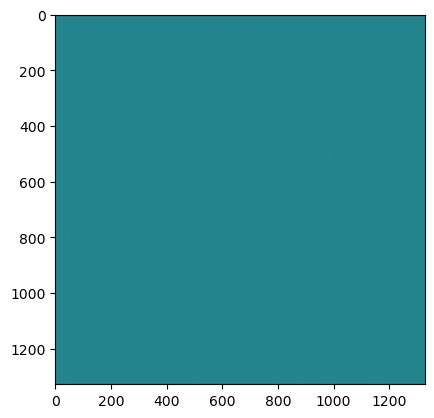

In [33]:

# fig, ax = plt.subplots()
# ax.imshow(cov_mf[100:, 100:])

In [14]:
# trainset_allprot.shape#.head()

(28487, 1428)

In [52]:
# from sklearn.manifold import TSNE

# t = TSNE(perplexity = 40)
# allprot_t = t.fit_transform(trainset_allprot)


In [16]:
# allprot_t.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [37]:
# male_df.head()

,AARSD1,ABHD14B,ABL1,ACAA1,ACAN,ACE2,ACOX1,ACP5,ACP6,ACTA2,...,WNT9A,WWP2,XCL1,XG,XPNPEP2,XRCC4,YES1,YTHDF3,ZBTB16,ZBTB17
eid,,,,,,,,,,,,,,,,,,,,,
1000041,0.34760,-0.18790,-0.38960,0.1511,0.5124,-0.28310,0.27590,-0.30920,-0.20010,-0.3444,...,-0.1501,0.1150,-1.1485,-0.15830,1.08020,0.00705,-0.5165,-0.20180,-0.39815,-0.74750
1000086,0.76670,0.19490,-0.59070,-2.0024,0.1910,0.05565,-0.52100,-0.02920,-0.38070,-0.3239,...,-0.1429,-0.4454,0.2656,-0.10330,1.59790,-0.83675,-1.1427,-1.48585,-0.55125,-0.02300
1000345,0.31910,0.55910,0.47690,-0.2783,0.2849,0.16560,0.08440,-0.09380,0.06330,-0.0207,...,0.0618,0.3204,-0.3574,-0.52610,-0.31120,-0.18660,1.0092,0.96570,0.36930,0.30520
1001039,0.09245,0.14800,0.60380,0.8137,-0.2499,0.05055,0.19520,-0.07780,-2.16000,-0.1075,...,0.0000,0.6201,0.4804,-0.00010,1.43090,0.28085,1.3969,1.27585,1.50335,-0.03710
1002171,0.11895,0.20455,-0.54515,1.1676,0.1741,1.14470,0.40565,0.23845,-1.15855,-0.0135,...,-0.5813,0.1603,-0.5197,-0.53185,-1.35315,-0.25205,0.0366,-0.29105,-0.27550,-0.39275


In [39]:
# male_idx = np.where( male_df.index.isin(trainset_allprot.index))
# male_idx

(array([    0,     1,     2, ..., 13084, 13085, 13086]),)

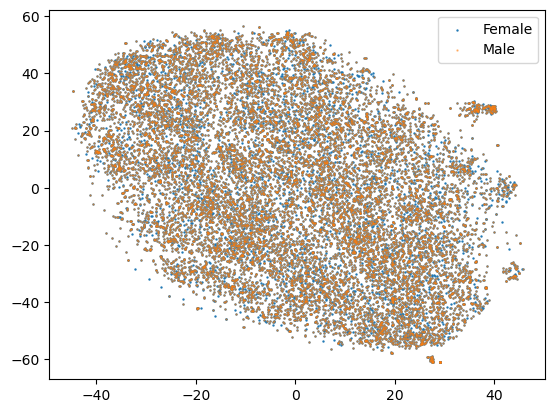

In [53]:
# mort_male = mort.loc[mort['sex'] == 1]
# mort_female = mort.loc[mort['sex'] == 0]

# male_df = trainset_allprot.loc[trainset_allprot.index.isin(mort_male.index)]
# female_df = trainset_allprot.loc[trainset_allprot.index.isin(mort_female.index)]

# male_idx = np.where( male_df.index.isin(trainset_allprot.index))
# female_idx = np.where( female_df.index.isin(trainset_allprot.index))


# male_t = allprot_t[male_idx,:]
# female_t = allprot_t[female_idx,:]

# plt.scatter(female_t[0, :,0], female_t[0, :,1],marker = '.', s= 2, label = "Female")
# plt.scatter(male_t[0,:,0], male_t[0, :,1],marker = '.', s= 2, label = "Male", alpha = 0.5)
# plt.legend()
# # male_t = allprot_t.loc[allprot_t.index.isin(mort_male.index)] 
# # female_t = allprot_t.loc[allprot_t.index.isin(mort_female.index)] 


In [42]:
# male_t.shape

(1, 13087, 2)

In [165]:
# male_t.shape

(13087, 2)

In [ ]:
# print(trainset_male.head())